In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.style.use("bioAI.mplstyle")
import torch
import tqdm

import sys
sys.path.append('../')
from models import JacobianCI
from plotting_functions import set_size

In [3]:
color_cycler = plt.rcParams['axes.prop_cycle'].by_key()['color']
savefigs = False
dpi=150

In [4]:
def train_model(model):
    # Train model
    nsamples_space = 2**8
    loss_history = []
    for epoch in tqdm.trange(5000):
        rs = model.unit_cell.sample(nsamples_space)
        rs = torch.tensor(rs,dtype=dtype)
        loss = model.train_step(rs)
        loss_history.append(loss)
    loss_history = np.array(loss_history)
    return loss_history

In [5]:
# load trained model
dtype = torch.float32
# choose seed such that metagon is contained in zero-centered unit cell
loss_histories = []
for n in range(1,15):
    model = JacobianCI(ncells=n,dtype=dtype,lr=1e-3, shift=0, p_magnitude=0, seed=3)
    loss_history = train_model(model)
    loss_histories.append(loss_history)
loss_histories = np.array(loss_histories)

100%|██████████| 5000/5000 [00:08<00:00, 614.61it/s]


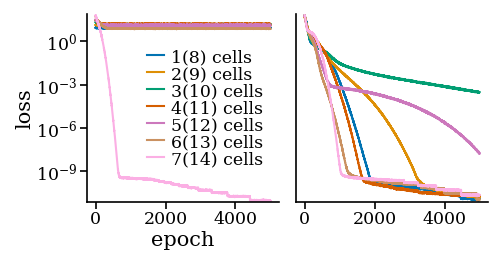

In [30]:
figsize = set_size(fraction=(2 * 1/3,1/3),mode='square')
fig, axs = plt.subplots(ncols=2, figsize=figsize)

#fig, axs = plt.subplots(ncols=2, figsize=(4,2))
ymin = loss_histories.min()
ymax = loss_histories.max()

for n in range(1,8):
    # plot loss history with different alpha level for each n
    axs[0].semilogy(loss_histories[n-1],label=f'{n}({n+7}) cells')
    axs[0].set_xlabel('epoch')
    axs[0].set_ylabel('loss')
    axs[0].set_ylim([ymin,ymax])
    axs[0].legend()

for n in range(8, 15):
    axs[1].semilogy(loss_histories[n-1])#,label=f'{n} cells')
    axs[1].set_ylim([ymin,ymax])
    axs[1].set_yticks([])
    #axs[1].legend()

"""
for n in range(11, 15):
    axs[2].semilogy(loss_histories[n-1],label=f'{n} cells')
    axs[0].set_ylim([ymin,ymax])
    axs[2].legend()
"""
plt.tight_layout(pad=0.1, w_pad=0.8, h_pad=0.1)
if True:
    fig.savefig('../results/A1-loss-history.pdf')